In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
len(x_train)

60000

In [4]:
len(x_test)

10000

In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

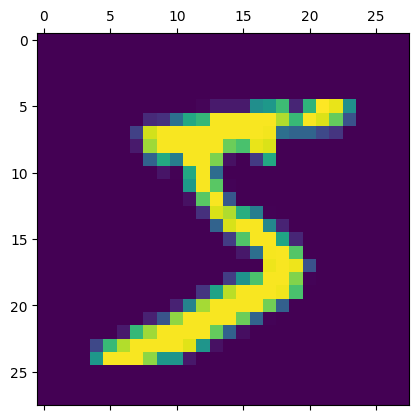

In [6]:
# voir un exemple
plt.matshow(x_train[0])

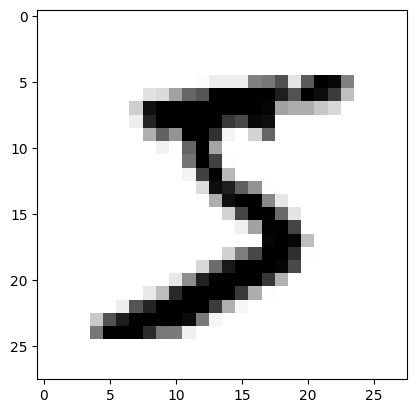

In [7]:
plt.imshow(x_train[0], cmap = plt.cm.binary)

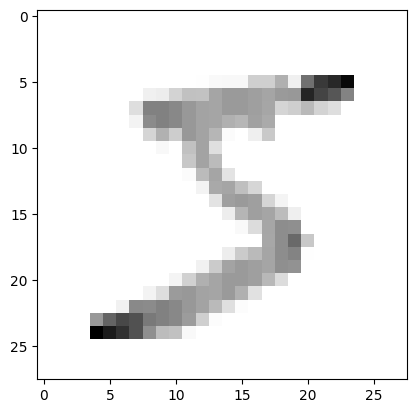

In [8]:
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)
plt.imshow(x_train[0], cmap = plt.cm.binary)

In [9]:
y_train[0]

5

In [10]:
# afficher les cinq premières données
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

## Pre-processing

In [11]:
IMG_SIZE=28
# -1 est une abréviation qui retourne la longueur de l'ensemble de données

x_trainr = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
x_testr = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
print("Training Samples dimension", x_trainr.shape)
print("Testing Samples dimension", x_testr.shape)

Training Samples dimension (60000, 28, 28, 1)
Testing Samples dimension (10000, 28, 28, 1)


### CNN model

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization

In [13]:
model = Sequential()

### Première couche de convolution
model.add(Conv2D(64, (3,3), input_shape = x_trainr.shape[1:])) # mentionner la taille de l'entrée pour la première couche
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

### Deuxième couche de convolution
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

### Troisième couche de convolution
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

### Couche entièrement connectée 1
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.5))

### Couche entièrement connectée 2
model.add(Dense(32))
model.add(Activation("relu"))
model.add(Dropout(0.5))

### Couche entièrement connectée 3, la couche de sortie doit être égale au nombre de classes
model.add(Dense(10))
model.add(Activation("softmax"))

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                   

In [47]:
model.compile(loss= keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer="adam", metrics=['accuracy'])

In [48]:
history = model.fit(x_trainr, y_train, epochs=5, validation_split = 0.3)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1313/1313 [==============================] - 77s 58ms/step - loss: 0.1145 - accuracy: 0.9660 - val_loss: 0.0813 - val_accuracy: 0.9807
Epoch 2/5
1313/1313 [==============================] - 69s 52ms/step - loss: 0.0941 - accuracy: 0.9713 - val_loss: 0.1121 - val_accuracy: 0.9757
Epoch 3/5
1313/1313 [==============================] - 68s 52ms/step - loss: 0.0874 - accuracy: 0.9731 - val_loss: 0.0894 - val_accuracy: 0.9824
Epoch 4/5
1313/1313 [==============================] - 73s 55ms/step - loss: 0.0767 - accuracy: 0.9757 - val_loss: 0.0973 - val_accuracy: 0.9811
Epoch 5/5
1313/1313 [==============================] - 71s 54ms/step - loss: 0.0647 - accuracy: 0.9792 - val_loss: 0.1059 - val_accuracy: 0.9824


In [17]:
# Évaluation de la précision
test_loss, test_acc = model.evaluate(x_testr, y_test)
print("Test Loss on 10,000 test samples", test_loss)
print("Test Accuracy on 10,000 test samples", test_acc)

313/313 [==============================] - 4s 13ms/step - loss: 0.0752 - accuracy: 0.9807
Test Loss on 10,000 test samples 0.07524456828832626
Test Accuracy on 10,000 test samples 0.9807000160217285


### Prediction

In [18]:
predictions = model.predict([x_testr])
print(predictions)

313/313 [==============================] - 5s 16ms/step
[[1.5849828e-10 3.3363334e-10 1.7937897e-07 ... 9.9999970e-01
  4.0275561e-11 4.2109800e-09]
 [2.0925972e-08 5.9537324e-08 9.9999911e-01 ... 3.5624825e-07
  3.9769355e-07 1.0666282e-10]
 [1.4155901e-07 9.9999958e-01 8.6376879e-08 ... 3.0056668e-08
  6.2119355e-08 1.0371444e-09]
 ...
 [3.4250317e-18 1.7599723e-09 1.0182840e-11 ... 1.2765730e-12
  1.1871513e-09 1.0181875e-06]
 [6.2713211e-06 5.8357034e-12 4.1929686e-09 ... 8.0955888e-11
  4.4344160e-06 2.7333901e-06]
 [2.6849891e-06 2.1599068e-12 3.3673773e-06 ... 7.3757521e-11
  8.1710341e-06 3.2646270e-08]]


7


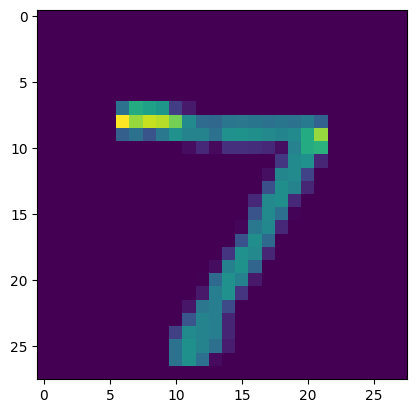

In [19]:
plt.imshow(x_test[0])
print(np.argmax(predictions[0]))

### confusion matrix pour la validation

In [20]:
y_predicted = model.predict(x_test)
y_predicted_labels = np.argmax(y_predicted, axis=1)

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

313/313 [==============================] - 4s 12ms/step


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    2,    0,    3,    3,    5,    1,    0,    1],
       [   0, 1120,    1,    0,    3,    3,    2,    4,    2,    0],
       [   2,    1, 1006,    1,    5,    0,    0,   16,    1,    0],
       [   0,    0,    5,  985,    0,    8,    0,    9,    1,    2],
       [   0,    0,    1,    0,  978,    0,    0,    1,    1,    1],
       [   3,    0,    1,    4,    0,  880,    1,    1,    2,    0],
       [   2,    2,    2,    0,    6,    4,  941,    0,    1,    0],
       [   0,    4,    9,    0,    0,    1,    0, 1013,    1,    0],
       [   1,    0,    2,    1,    3,    2,    1,    5,  957,    2],
       [   4,    0,    0,    0,   18,   10,    0,    9,    6,  962]],
      dtype=int32)>

Text(0.5, 1.0, 'Confusion Matrix')

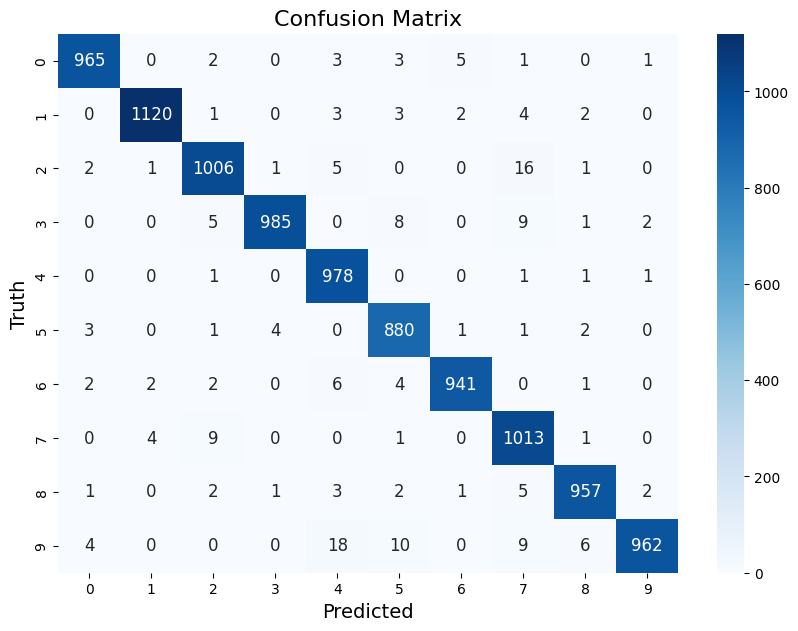

In [21]:
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 12})
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Truth', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)

<ipython-input-22-9e19bd9f8715>:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


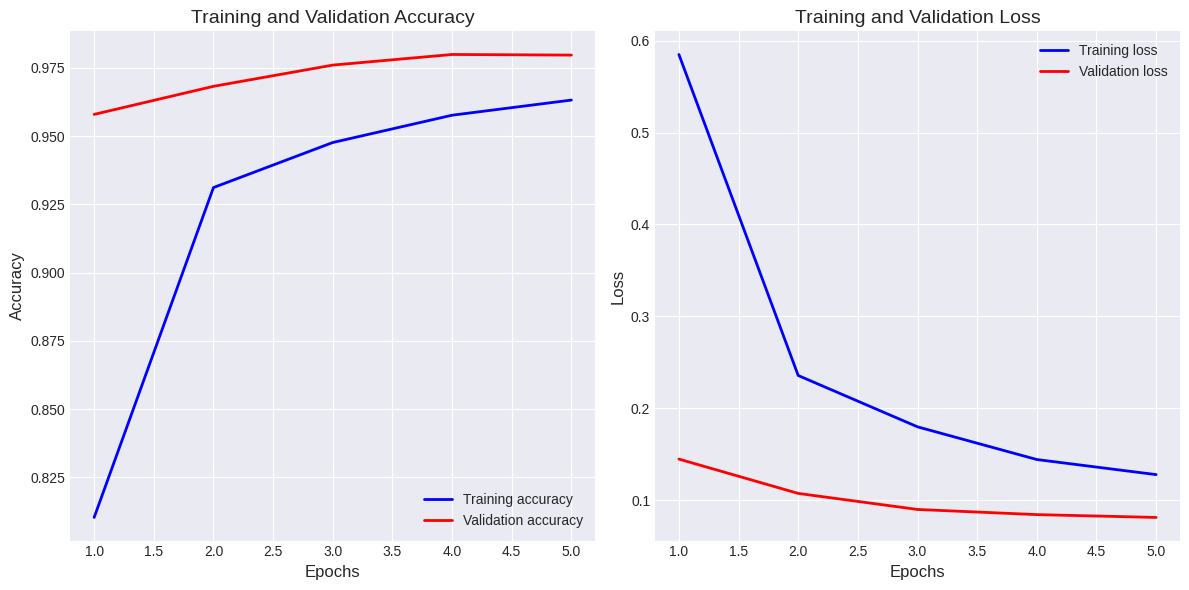

In [22]:
# Retrieve training and validation accuracy and loss
train_accuracy = history.history['accuracy']
train_loss = history.history['loss']
val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']

# Create epochs range
epochs = range(1, len(train_accuracy) + 1)

# Configure a modern and clean style for the plots
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(12, 6))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, 'b', label='Training accuracy', linewidth=2)
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy', linewidth=2)
plt.title('Training and Validation Accuracy', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'b', label='Training loss', linewidth=2)
plt.plot(epochs, val_loss, 'r', label='Validation loss', linewidth=2)
plt.title('Training and Validation Loss', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()

plt.tight_layout()

### Other handwritten numbers

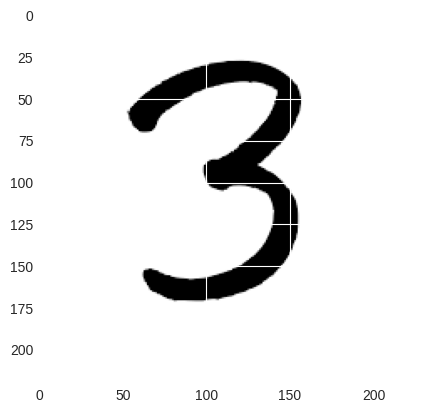

In [49]:
import cv2
img = cv2.imread('3.png')
plt.imshow(img)

In [50]:
img.shape

(221, 228, 3)

In [51]:
# Converting to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(221, 228)

In [52]:
# Resizing to a 28x28 image
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
resized.shape

(28, 28)

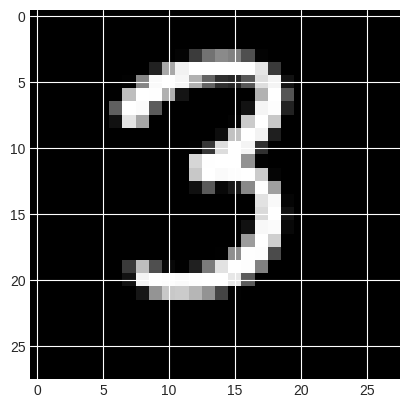

In [53]:
plt.imshow(resized)

In [54]:
# 0-1 scaling
newimg = tf.keras.utils.normalize(resized, axis = 1)
# For kernal operations
newimg = np.array(newimg).reshape(-1, IMG_SIZE, IMG_SIZE, 1) / 255
newimg.shape

(1, 28, 28, 1)

In [55]:
predictions = model.predict(newimg)
np.argmax(predictions[0])

1/1 [==============================] - 0s 162ms/step


3